In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

In [2]:
Adj(1e-9,45,100000)


(144, 1296000000)

# 1nano

3 times appart

In [2]:
modulation = 93 #Hz
loop_number = 149000     
res = 1/7098000000
sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [3]:
sam

288

In [4]:
sr

7981631999

In [5]:
interval = segment_length*1e9 #nano
interval

36.08284621490944

# AWG and Pulse files setup

In [8]:
AWG_Settings_1nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700, #this amplitude should be greater than the pump amplitude
    'Clock Sample Frecuency':7981631999,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\150,50\1nano'
}

In [19]:
AWG_Settings_1nano['Voltage Amplitude']

700

In [9]:
M8190A = VisaR(AWG_Settings_1nano,60000)

In [10]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [21]:
Initialization(M8190A,AWG_Settings_1nano)

Instruments Sampling Frecuency set to 2.99980800000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [11]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude': 2*150,
    'Start time':15,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':2*50,
    'Start time':13,
    'End time':17,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
ProbeB_1nano= {
    'Name':'ProbeB_1nano',
    'Amplitude':-2*50,
    'Start time':13,
    'End time':17,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [14]:
ProbeB_1nano_empty= {
    'Name':'ProbeB_1nano',
    'Amplitude':0*50,
    'Start time':11300,
    'End time':500,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [15]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\150,50\1nano'
}

In [16]:
PulseScheme_B_1nano =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\150,50\1nano'
}

In [17]:
PulseScheme_B_1nano_empty =  {
    'Name' : 'PulseScheme_B_1nano_empty',
    'Pulse Scheme': [ProbeB_1nano_empty,ProbeB_1nano_empty],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\150,50\1nano'
}

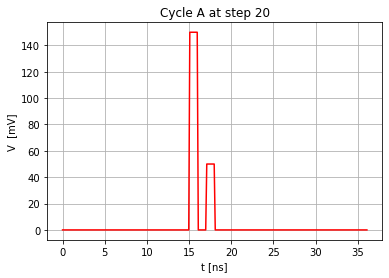

In [60]:
step = 20
pul1 = Sweep_teil(PulseScheme_A_1nano,20,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100 nano 93 Hz mod , {a} step.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'], a = step),bbox_inches='tight')

In [18]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,30,interval,sam,0,30,AWG_Settings_1nano,'A')[0]
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,30,interval,sam,0,30,AWG_Settings_1nano,'B')[0]

In [33]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_71steps_93Hz_1nano_.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)

In [51]:
sweeping_run_b_1nano_empty = Sweeping_Single_List_File_teil(PulseScheme_B_1nano_empty,70,interval,sam,0,70,AWG_Settings_1nano_empty,'B')[0]

In [52]:
#Exporting pickle

with open(r"{dict}\cycleB_71steps_93Hz_1nano_empty.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano_empty, h)

In [17]:
#Importing Pickle

with open(r"{dict}\cycleA_71steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_71steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano= pickle.load(f)

In [ ]:
sweeping_runa_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_4128_30.csv'

In [ ]:
sweeping_run_b_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [62]:
loop_number

149000

In [19]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 70'],sweeping_runb_1nano['Pulse File Location, at step 70'],8000)

Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND


2

In [21]:
Sequence_File(M8190A,sweeping_run_a_1nano['Pulse File Location, at step 30'],sweeping_run_b_1nano['Pulse File Location, at step 30'],8000)

Sequence loaded with the following segment data "1,8000,0,1,0,575,2,8000,0,1,0,575" and the advancement method is AUTO


2

# Loading

In [90]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [64]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '20 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [24]:
loop_number

8000

In [91]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1nano,sweeping_run_b_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings,loop_number)

Sequence loaded with the following segment data "1,149000,0,1,0,287,2,149000,0,1,0,287" and the advancement method is COND
Average Value for measurement at step 0 is 0.8962675938227198 V
Sequence loaded with the following segment data "1,149000,0,1,0,287,2,149000,0,1,0,287" and the advancement method is COND
Average Value for measurement at step 1 is 0.89625899602283 V
Sequence loaded with the following segment data "1,149000,0,1,0,287,2,149000,0,1,0,287" and the advancement method is COND
Average Value for measurement at step 2 is 0.8962414715454612 V
Sequence loaded with the following segment data "1,149000,0,1,0,287,2,149000,0,1,0,287" and the advancement method is COND
Average Value for measurement at step 3 is 0.8962287392844294 V
Sequence loaded with the following segment data "1,149000,0,1,0,287,2,149000,0,1,0,287" and the advancement method is COND
Average Value for measurement at step 4 is 0.8967049540374682 V
Sequence loaded with the following segment data "1,149000,0,1,0,287

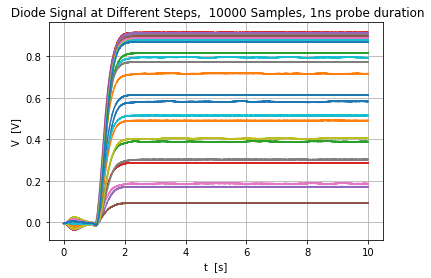

In [92]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100 nano,71 steps, 93 Hz no legend, .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [93]:
time_delay = np.linspace(-2,2,31)

In [ ]:
%matplotlib widget

In [41]:
1/8e9

1.25e-10

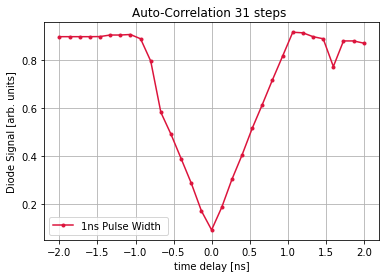

In [94]:
fig,axes = plt.subplots()

axes.grid(True)


plt.plot(time_delay,averaged_data,'.-',label=r'1ns Pulse Width ',color='crimson')


axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()


fig.savefig(r'{loc}\Autocorrelation function 31 steps 1nano 93Hz length tc = {a}, sens {b}, {c}s DAQ empty cycle B.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [95]:
flipped_1n = (averaged_data*-1)-np.amin(averaged_data*-1)
max_1n = np.amax(flipped_1n)
norm_1n = flipped_1n/max_1n
np.savetxt(r'{loc}\Normalized autocorrelation 1n.csv'.format(loc = PulseScheme_A_1nano['Measurement file Path']),norm_1n,delimiter=',')

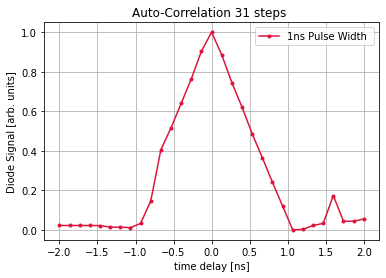

In [96]:
fig,axes = plt.subplots()

axes.grid(True)


plt.plot(time_delay,norm_1n,'.-',label=r'1ns Pulse Width ',color='crimson')


axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation 100n normalized.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path']))

In [67]:
import random

In [65]:
list_cycleA_100nano = list(sweeping_run_a_100nano.values())
list_cycleA_100nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_8.csv',
 

In [ ]:
random.shuffle(list_cycleA_100nano)
list_cycleA_100nano

In [66]:
list_cycleB_100nano = list(sweeping_run_b_100nano.values())
list_cycleB_100nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_8.csv',
 

In [68]:
c = list(zip(list_cycleA_100nano,list_cycleB_100nano))
random.shuffle(c)

list_cycleA_100nano, list_cycleB_100nano = zip(*c)



In [69]:
list_cycleA_100nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_64.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_37.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_39.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_31.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_57.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_27

In [70]:
list_cycleB_100nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_64.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_37.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_39.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_31.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_57.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_27